# SUPERVISED LEARNING
# REGRESSION
# LINEARREGRESSION ALGORITHM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Housing.csv')

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.shape

(545, 13)

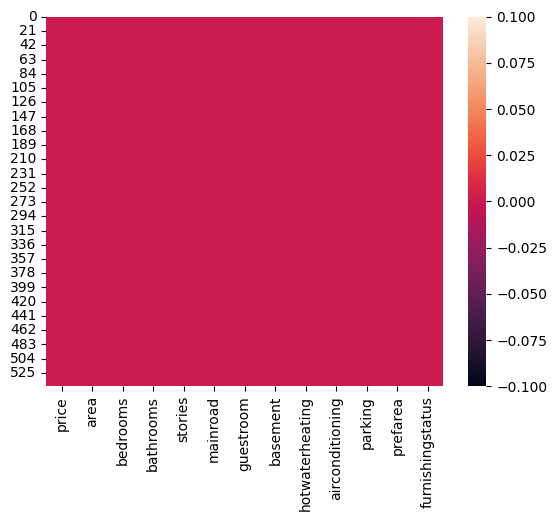

In [ ]:
sns.heatmap(df.isnull())
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


now i observe that our 7 columns mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus are not numerical so convert first these into categorical as:

In [ ]:
obj_var = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for columns in obj_var:
  df[columns] = df[columns].astype('category')

now our object data columns are converted into category datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


now convert these category data columns in int type data as

In [ ]:
mainroar_var = pd.get_dummies(df['mainroad'], drop_first = True, dtype = int)
guestroom_var = pd.get_dummies(df['guestroom'], drop_first = True, dtype = int)
hotwaterheating_var = pd.get_dummies(df['hotwaterheating'], drop_first = True, dtype = int)
airconditioning_var = pd.get_dummies(df['airconditioning'], drop_first = True, dtype = int)
prefarea_var = pd.get_dummies(df['prefarea'], drop_first = True, dtype = int)
furnishingstatus_var = pd.get_dummies(df['furnishingstatus'], drop_first = True, dtype = int)

In [ ]:
print(mainroar_var.head())
print(guestroom_var.head())
print(hotwaterheating_var.head())
print(airconditioning_var.head())
print(prefarea_var.head())
print(furnishingstatus_var.head())

   yes
0    1
1    1
2    1
3    1
4    1
   yes
0    0
1    0
2    0
3    0
4    1
   yes
0    0
1    0
2    0
3    0
4    0
   yes
0    1
1    1
2    0
3    1
4    1
   yes
0    1
1    0
2    1
3    1
4    0
   semi-furnished  unfurnished
0               0            0
1               0            0
2               1            0
3               0            0
4               0            0


now we can see out data is converted in to 0 and 1's foam
now put thsese new columns in data set and remove older columns as

In [ ]:
# input new columns in dataset
df = pd.concat([df,mainroar_var,guestroom_var,hotwaterheating_var,airconditioning_var,prefarea_var,furnishingstatus_var], axis = 1)

now remove older columns as :

In [ ]:
df.drop(['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'], axis = 1, inplace = True)

now we can see out all data is in int from ready to give to the model

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   price           545 non-null    int64
 1   area            545 non-null    int64
 2   bedrooms        545 non-null    int64
 3   bathrooms       545 non-null    int64
 4   stories         545 non-null    int64
 5   parking         545 non-null    int64
 6   yes             545 non-null    int64
 7   yes             545 non-null    int64
 8   yes             545 non-null    int64
 9   yes             545 non-null    int64
 10  yes             545 non-null    int64
 11  semi-furnished  545 non-null    int64
 12  unfurnished     545 non-null    int64
 13  yes             545 non-null    int64
 14  yes             545 non-null    int64
 15  yes             545 non-null    int64
 16  yes             545 non-null    int64
 17  yes             545 non-null    int64
 18  semi-furnished  545 non-null  

,price,area,bedrooms,bathrooms,stories,parking,yes,yes,yes,yes,yes,semi-furnished,unfurnished,yes,yes,yes,yes,yes,semi-furnished,unfurnished
0,13300000,7420,4,2,3,2,1,0,0,1,1,0,0,1,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,1,0,0,0,1,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,0,0,1,1,0,1,0,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,0,1,1,0,0,1,0,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,0,1,0,0,0,1,1,0,1,0,0,0


# splitting data

In [ ]:
x = df.drop('price', axis = 1)
y = df['price']

In [ ]:
# use x and y data variable to split in to train and test data as:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

now import model linearregression and give data to train as:

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

our model is trained and now test it as : using x_test data

In [ ]:
# model prediction save in other variable to for find model behavior or mean square error
lr_pred = lr.predict(x_test)
print(lr_pred.shape)
print(lr_pred)

(109,)
[4852873.51472735 7359513.93540964 3224086.2352847  4718916.23789441
 3458571.78626812 3621421.1560956  5769110.92658886 6369441.52275284
 2971145.56755731 2791152.46912279 9711776.24117285 2878681.99780266
 3278008.23038236 3076861.48422693 3334444.85908819 5540279.05936673
 3098189.20028235 4847714.99350557 3984246.93498691 3668755.74729866
 5769177.32441575 5897461.55248399 2814023.42080063 4620584.72756108
 4959738.42604379 7282734.82776429 3095392.74280727 5114057.71488743
 7861029.9964125  3467023.51820036 6313449.06446877 3364885.82896747
 6961033.79643857 4255877.61238832 3627750.18916702 5979619.80358024
 4663921.81215559 4095326.25867326 3334232.11145376 4768216.26354839
 4675200.59215653 3639150.07751808 7341364.15940907 4073225.70716734
 3838909.897304   4374029.22841948 6747803.04972923 4141760.56633269
 3812487.97303197 3113348.04276667 7207648.44022911 2890065.70288134
 4435563.99910749 4223919.79275449 3370250.24215894 2838795.63112429
 7694437.35792025 2978255.5

# now plot scatter plot to see line of regression using y_test and lr_pred as

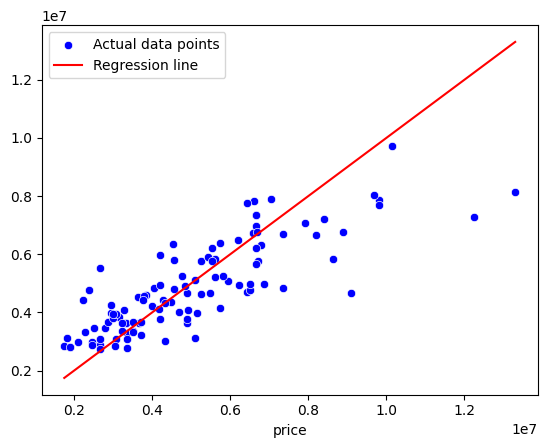

In [ ]:
sns.scatterplot(x = y_test, y = lr_pred, color = 'b', label = 'Actual data points')
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)] , color= 'r', label = 'Regression line')
plt.legend()
plt.show()

# combine actual and predicted value side by side to see result as:

In [ ]:
results = np.column_stack([y_test,lr_pred])
print('Actual value   |   Predicted value')
for actual,predicted in results:
  print(actual, "-----", predicted)

Actual value   |   Predicted value
4060000.0 ----- 4852873.514727355
6650000.0 ----- 7359513.935409639
3710000.0 ----- 3224086.2352847047
6440000.0 ----- 4718916.23789441
2800000.0 ----- 3458571.7862681225
4900000.0 ----- 3621421.156095597
5250000.0 ----- 5769110.926588856
4543000.0 ----- 6369441.522752845
2450000.0 ----- 2971145.5675573144
3353000.0 ----- 2791152.4691227907
10150000.0 ----- 9711776.241172854
2660000.0 ----- 2878681.9978026557
3360000.0 ----- 3278008.2303823642
3360000.0 ----- 3076861.4842269286
2275000.0 ----- 3334444.85908819
2660000.0 ----- 5540279.059366725
2660000.0 ----- 3098189.200282353
7350000.0 ----- 4847714.993505571
2940000.0 ----- 3984246.9349869117
2870000.0 ----- 3668755.747298663
6720000.0 ----- 5769177.324415749
5425000.0 ----- 5897461.552483994
1890000.0 ----- 2814023.4208006263
5250000.0 ----- 4620584.727561076
4193000.0 ----- 4959738.426043789
12250000.0 ----- 7282734.827764292
3080000.0 ----- 3095392.7428072714
5110000.0 ----- 5114057.714887434
980

# RESIDUAL ANALYSIS

[  677126.48527265 -1829513.93540964  2305913.7647153    811083.76210559
  2071428.21373188  1908578.8439044   -239110.92658886  -839441.52275284
  2558854.43244269  2738847.53087721 -4181776.24117285  2651318.00219734
  2251991.76961764  2453138.51577307  2195555.14091181   -10279.05936673
  2431810.79971765   682285.00649443  1545753.06501309  1861244.25270134
  -239177.32441575  -367461.55248399  2715976.57919937   909415.27243892
   570261.57395621 -1752734.82776429  2434607.25719273   415942.28511257
 -2331029.9964125   2062976.48179964  -783449.06446877  2165114.17103253
 -1431033.79643857  1274122.38761168  1902249.81083298  -449619.80358024
   866078.18784441  1434673.74132674  2195767.88854624   761783.73645161
   854799.40784347  1890849.92248192 -1811364.15940907  1456774.29283266
  1691090.102696    1155970.77158052 -1217803.04972923  1388239.43366731
  1717512.02696803  2416651.95723333 -1677648.44022911  2639934.29711866
  1094436.00089251  1306080.20724551  2159749.75784

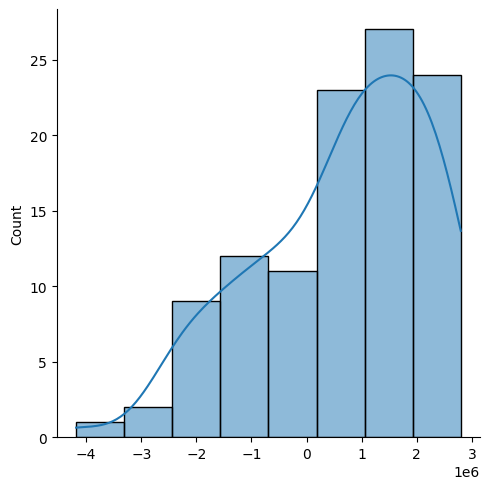

In [ ]:
# difference between actual and predicted value
residual_var = actual-lr_pred.reshape(-1)
print(residual_var)

# displot of actual-lr_pred as
sns.displot(residual_var,kde = True)
plt.show()

# MODEL EVALUATION
> FIND MEAN SQUARE ERROR

> FIND ROOT MEAN SQUARE ERROR

In [ ]:
from sklearn.metrics import mean_squared_error
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
print("MEAN SQUARE ERROR",lr_mse)
print("ROOT MEAN SQUARE ERROR",lr_rmse)

MEAN SQUARE ERROR 1757591474716.867
ROOT MEAN SQUARE ERROR 1325741.8582502655


 WE CAN SEE OUT MEAN SQUARE ERROR IS VERY HIGH IT MEANS OUR MODEL IS NO PREDICTED WELL
 BEACUSE IN THIS WE DON'T PERFORM DATA TRANSFORMATION IN OUR COLUMNS SOME DATA IS SMALL AND SOME DATA IS VERY LARGE MODEL GIVE PRIRITY TO LARGE DATA TO LEARN FROM IT
 > SO WE SHOULD PERFORM DATA TRANFROMTION

 >STANDARDIZATION AND NORMALIZATION AND OTHER TECHNIQUES